In [2]:
import pandas as pd
import numpy as np

raw_data = {'first_name':['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name':['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age':[42, np.nan, 36, 24, 79],
            'sex':['m', np.nan, 'f', 'm', 'f'],
            'preTestScore':[4, np.nan, np.nan, 2, 3],
            'postTestScore':[25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [3]:
df.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [4]:
df.isnull().sum()/len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

In [5]:
df.dropna() # 결측치가 있는 모든 데이터의 행 제거

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [6]:
df # 드롭과 관련된 대부분의 명령어들은 실제 드롭한 결과를 반환하나 객체에 드롭 결과를 저장하지 않는다.

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [7]:
df_no_missing = df.dropna() # 드롭의 결과를 저장하기 위해 다른 변수에 재할당 또는 매개변수 inplace=True을 사용할 것
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [8]:
df_cleaned = df.dropna(how='all') # 행에 있는 모든 값이 NaN일 때 해당 행을 삭제한다.
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [9]:
df['location'] = np.nan
df.dropna(axis=1, how='all') # 열값이 모두 NaN일 경우 축을 추가하여 삭제한다.

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,79.0,f,3.0,70.0


In [10]:
df.dropna(thresh=1) # 데이터가 한개라도 존재하는 행을 남긴다.

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,79.0,f,3.0,70.0,NaN


In [11]:
df.dropna(thresh=5) #데이터가 5개 이상 있어야 남긴다.

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,79.0,f,3.0,70.0,NaN


In [12]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,79.0,f,3.0,70.0,0.0


In [13]:
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace=True) # NaN값이 아닌 preTestScore 값들의 평균
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,79.0,f,3.0,70.0,NaN


In [14]:
df.groupby('sex')["postTestScore"].transform("max")

0    62.0
1     NaN
2    70.0
3    62.0
4    70.0
Name: postTestScore, dtype: float64

In [15]:
df['postTestScore'].fillna(df.groupby('sex')['postTestScore'].transform('mean'), inplace=True) # fillna 함수 안에 transform
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,79.0,f,3.0,70.0,NaN


In [16]:
import pandas as pd

edges = pd.DataFrame({'source':[0, 1, 2],
                      'target':[2, 2, 3],
                      'weight':[3, 4, 5],
                      'color':['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [17]:
edges.dtypes # color : 범주형데이터

source     int64
target     int64
weight     int64
color     object
dtype: object

In [18]:
pd.get_dummies(edges) # 원핫인코딩 : 범주형 데이터의 개수만큼 가변수를 생성하여 존재 유무를 0 또는 1로 표현한 것

,source,target,weight,color_blue,color_red
0,0,2,3,False,True
1,1,2,4,True,False
2,2,3,5,True,False


In [19]:
pd.get_dummies(edges['color'])

,blue,red
0,False,True
1,True,False
2,True,False


In [20]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,False,True
1,True,False
2,True,False


In [22]:
weight_dict = {3:'M', 4:'L', 5:'XL'}
edges['weight_sign'] = edges['weight'].map(weight_dict)
weight_sign = pd.get_dummies(edges['weight_sign'])
weight_sign

,L,M,XL
0,False,True,False
1,True,False,False
2,False,False,True


In [23]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,False,True,False
1,1,2,4,blue,L,True,False,False
2,2,3,5,blue,XL,False,False,True


In [24]:
raw_data = {'regiment':['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company':['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd'],
            'preTestScore':[4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore':[25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data)
df

,regiment,company,preTestScore,postTestScore
0,Nighthawks,1st,4,25
1,Nighthawks,1st,24,94
2,Nighthawks,2nd,31,57
3,Nighthawks,2nd,2,62
4,Dragoons,1st,3,70
5,Dragoons,1st,4,25
6,Dragoons,2nd,24,94
7,Dragoons,2nd,31,57
8,Scouts,1st,2,62
9,Scouts,1st,3,70


In [25]:
# 범주형 데이터로 변환하여 처리 : 바인딩
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [26]:
df = pd.DataFrame(
    {'A':[14.00, 90.20, 90.95, 96.27, 91.21],
     'B':[103.02, 107.26, 110.35, 114.23, 114.68],
     'C':['big', 'small', 'big', 'small', 'small']
     }
)
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [27]:
# 스케일링할 때는 브로드캐스팅 개념으로 스칼라 값과 벡터(열)값 간 연산
df['A'] - df['A'].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [29]:
# 최솟값-최댓값 정규화 방법
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [32]:
# Z 스코어 정규화 방법
(df['B'] - df['B'].mean()) / (df['B'].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)

DATA_DIR = '/content/data'
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [35]:
data_files = sorted([os.path.join(DATA_DIR, filename)
  for filename in os.listdir(DATA_DIR)], reverse=True) # 경로를 내림차순 정렬
data_files

['/content/data/train.csv', '/content/data/test.csv']

In [36]:
df_list = []
for filename in data_files:
  df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
number_of_train_dataset = df.Survived.notnull().sum()
number_of_test_dataset = df.Survived.isnull().sum()
y_true = df.pop('Survied')[:number_of_train_dataset]

In [43]:
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [44]:
pd.options.display.float_format = '{:.2f}'.format
df.isnull().sum()/len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [50]:
df[df['Age'].notnull()].groupby(['Sex'])['Age'].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [49]:
df.groupby(['Sex'])['Age'].mean() # 차이가 얼마 없다.

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [51]:
df.groupby('Pclass')['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [52]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
df.isnull().sum()/len(df)*100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [55]:
null_embarked = df[df['Embarked'].isnull()]
null_embarked

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


In [56]:
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


In [57]:
df.loc[61, "Embarked"] = 'S'
df.loc[829, "Embarked"] = 'S'

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [59]:
# 데이터 타입 정리
object_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']
for col_name in object_columns:
  df[col_name] = df[col_name].astype(object)
for col_name in numeric_columns:
  df[col_name] = df[col_name].astype(float)

df['Parch'] = df['Parch'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)


In [66]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
  if index is True:
    return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
  else:
    return pd.merge(ldf, rdf, how=how, on=on)

In [67]:
one_hot_df = merge_and_get(df, pd.get_dummies(df['Sex'], prefix='Sex'), on=None, index=True)
one_hot_df = merge_and_get(df, pd.get_dummies(df['Pclass'], prefix='Pclass'), on=None, index=True)
one_hot_df = merge_and_get(df, pd.get_dummies(df['Embarked'], prefix='Embarked'), on=None, index=True)

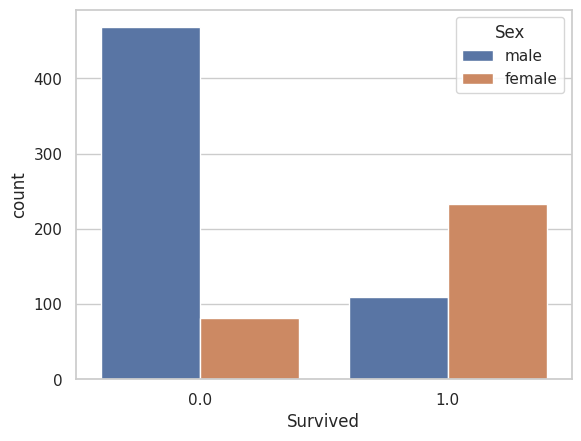

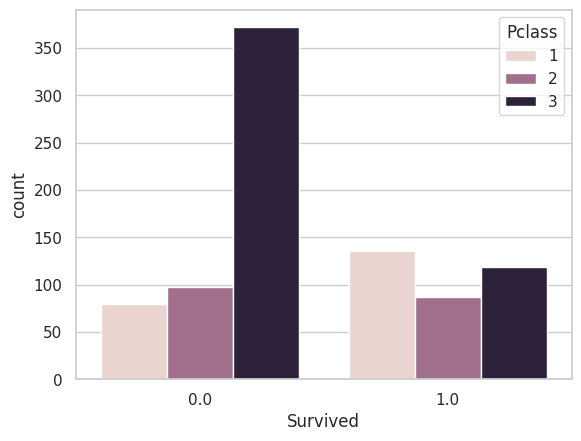

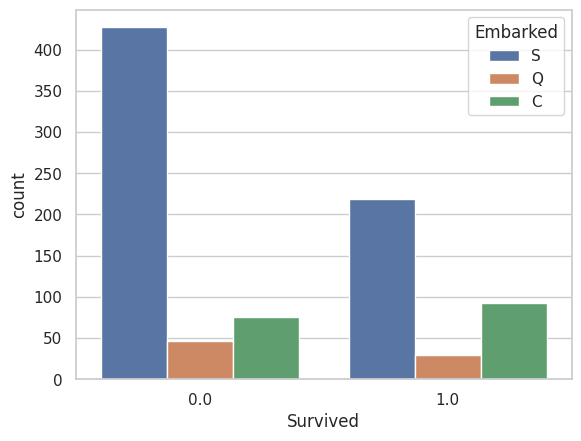

In [69]:
temp_columns = ['Sex', 'Pclass', 'Embarked']
for col_name in temp_columns:
  temp_df = pd.merge(
      one_hot_df[col_name], y_true, left_index=True, right_index=True
  )
  sns.countplot(x='Survived', hue=col_name, data=temp_df)
  plt.show()

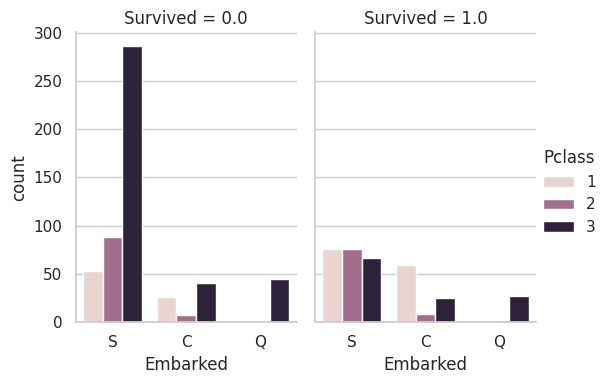

In [72]:
temp_df = pd.merge(
      one_hot_df[temp_columns], y_true, left_index=True, right_index=True
  )

g = sns.catplot(x='Embarked',
                hue='Pclass',
                col='Survived',
                data=temp_df,
                kind='count',
                height=4, aspect=.7)

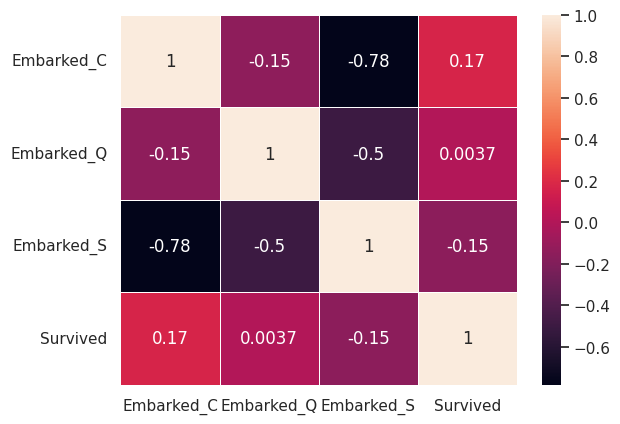

In [76]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist() if col_name.split("_")[0] in temp_columns and "_" in col_name]

temp_df = pd.merge(
      one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True
  )
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidth=.5)